<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

##**Módulo | Python: Projeto Final**
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

##**Tópicos**

<ol type="1">
  <li>Descrição do problema;</li>
  <li>Exploração de dados;</li>
  <li>Transformação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Storytelling.</li>
</ol>


##1\. *Breve descrição do problema:*

Vamos explorar dados de crédito presentes neste neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.


| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |






##2\. Exploração de dados
Começamos então importando os pacotes que vamos utilizar, e vamos ler os dados em um dataframe pandas.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

In [52]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Com o dados em mãos, vamos conhecer um pouco melhor a estrutura do nosso conjunto de dados.

### **2.1. Estrutura** 



In [53]:
df.shape

(10127, 16)

In [54]:
df[df['default'] == 0].shape

(8500, 16)

In [55]:
df[df['default'] == 1].shape

(1627, 16)

In [56]:
# vamos calcular a proporção de clientes adimplente e inadimplente.
qtd_total, _= df.shape
qtd_adimplentes, _= df[df['default'] == 0].shape
qtd_inadimplentes, _=df[df['default'] == 1].shape

In [57]:
print(f'A proporção de clintes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A proporção de clintes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporção de clintes adimplentes é de 83.93%
A proporção de clintes inadimplentes é de 16.07%


**Obs:** Podemos notar que a nossa base é composta por mais de 80% de clientes adimplente.

### **2.2. Schema** 

In [58]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [59]:
df.dtypes # Aqui podemos ver os tipos de cada coluna.

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

- **Obs:**

 As colunas **limite_credito**  e  **qtd_transacoes_12m** estão sendo reconhecidas como object.         

 Vamos corrigir na etapa de tratamento.

- Vamos separar as colunas por atributos **categóricos**, e atributos **numéricos**.

- Atributos **categóricos.**

In [60]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Podemos confirmar que  as colunas **limite_credito**  e  **qtd_transacoes_12m** realmente estão sendo reconhecidas como object. 

- Atributos **numéricos.**

In [61]:
df.drop('id', axis =1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.3. Dados faltantes** 

Aqui vamos ver se temos dados faltates na nossa base de dados.

In [62]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [63]:
df.isna().any() # Vamos verificar quais colunas possuem dados faltantes.

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [64]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [65]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [66]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [67]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 3\. Transformação e limpeza de dados

Agora que conhecemos melhor a natureza do nosso conjunto de dados, vamos conduzir uma atividade conhecida como *data wrangling* que consiste na transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Em especial, vamos remover:

 - Corrigir o *schema* das nossas colunas;
 - Remover os dados faltantes.

### **3.1. Correção de schema** 

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [68]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [69]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função `lambda` para limpar os dados.

In [70]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

In [71]:
df.dtypes 

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Podemos notar que as colunas **limite_credito** e **valor_transacoes_12m** agora está sendo reconhecida como float.

 - Atributos **categóricos**.

In [72]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [73]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **3.2. Remoção de dados faltantes** 

Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.

In [74]:
df.dropna(inplace=True)

Vamos analisar a estrutura dos dados novamente.

In [75]:
df.shape

(7081, 16)

In [76]:
df[df['default'] == 0].shape

(5968, 16)

In [77]:
df[df['default'] == 1].shape

(1113, 16)

In [78]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [79]:
print(f'A proporção de adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A nova proporção de clintes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%')
print('')
print(f'A proporção de clintes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')
print(f'A nova proporção de clintes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%')

A proporção de adimplentes ativos é de 83.93%
A nova proporção de clintes adimplentes é de 84.28%

A proporção de clintes inadimplentes é de 16.07%
A nova proporção de clintes inadimplentes é de 15.72%


## 4\. Visualização de dados

Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

In [80]:
df_adimplente = df[df['default'] == 0]

In [81]:
df_inadimplente = df[df['default'] == 1]

### **4.1. Visualizações categóricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [82]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


In [83]:
coluna_escolaridade = 'escolaridade'
titulo_escolaridade = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadiplentes']

In [84]:
coluna_salario = 'salario_anual'
titulo_salario = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

In [85]:
coluna_estado_civil = 'estado_civil'
titulo_estado_civil = ['Estado_civil dos Clientes', 'Estado_civil dos Clientes Adimplentes', 'Estado_civil dos Clientes Inadimplentes']

In [86]:
coluna_tipo_cartao = 'tipo_cartao'
titulo_tipo_cartao = ['Tipo de cartao dos Clientes', 'Tipo de cartao dos Clientes Adimplentes', 'Tipo de cartao dos Clientes Inadimplentes']

In [87]:
def plot_tabela_clientes(df, df_adimplente, df_inadimplente, coluna=None, titulos=None):

    eixo = 0
    max_y = 0
    max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

    for dataframe in [df, df_adimplente, df_inadimplente]:
        df_to_plot = dataframe[coluna].value_counts().to_frame()
        df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
        df_to_plot[coluna] = df_to_plot.index
        df_to_plot.sort_values(by=[coluna], inplace=True)
        df_to_plot.sort_values(by=[coluna])

        f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
        f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequencia Absoluta')
        f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1
        plt.close()
    
    return figura

 - Escolaridade

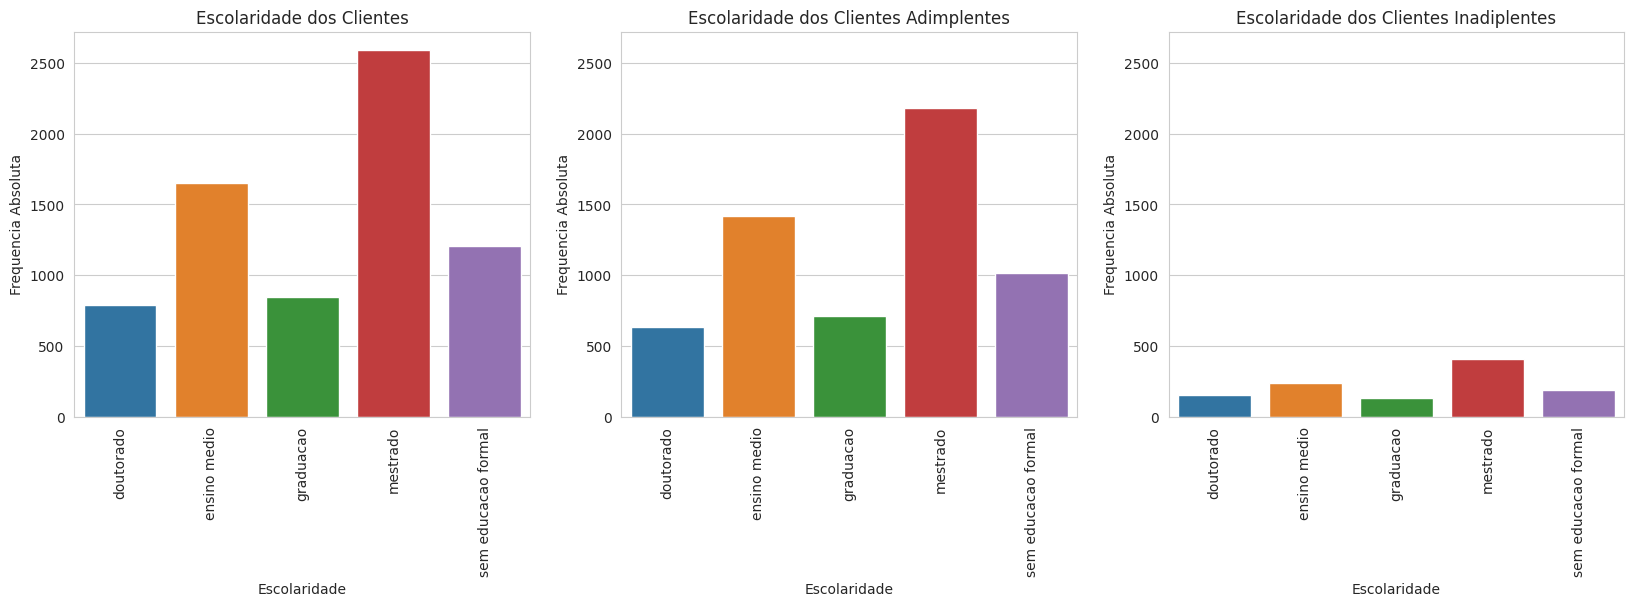

In [88]:
plot_tabela_clientes(df, df_adimplente, df_inadimplente, coluna=coluna_escolaridade, titulos=titulo_escolaridade)

 - Salário Anual

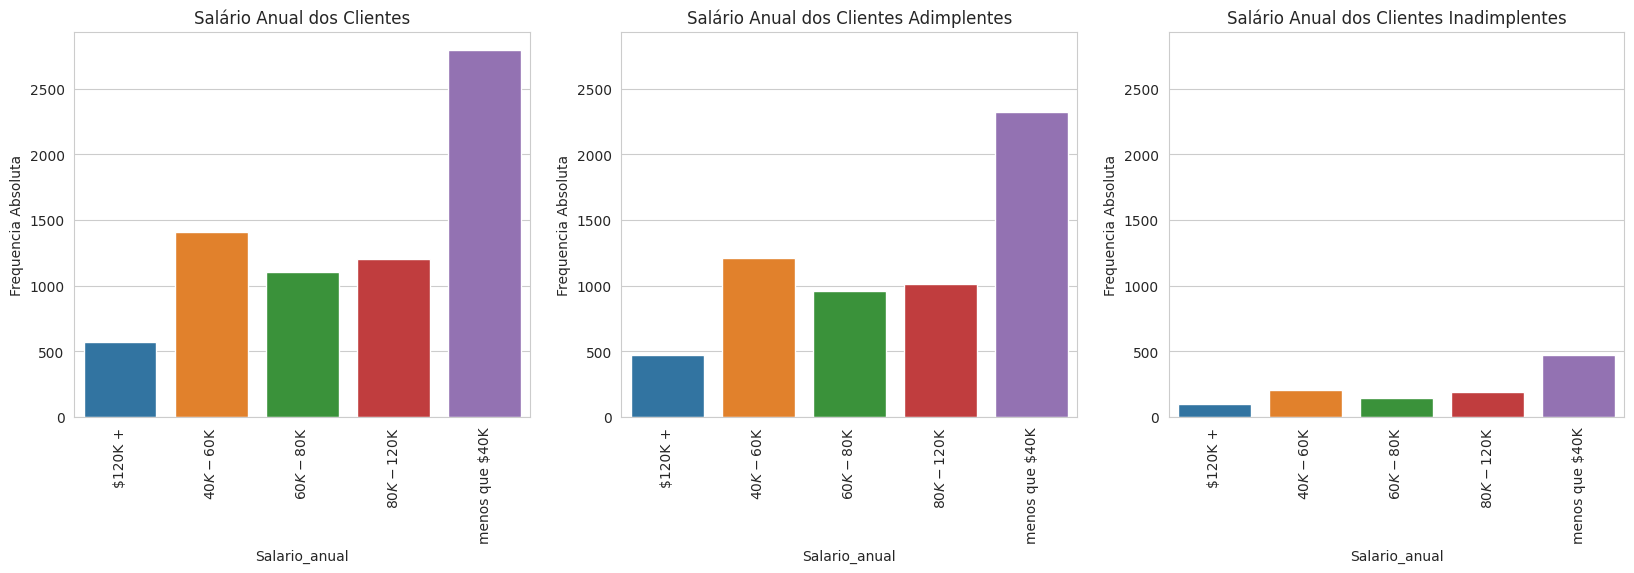

In [89]:
plot_tabela_clientes(df, df_adimplente, df_inadimplente, coluna=coluna_salario, titulos=titulo_salario)

- Estado civil

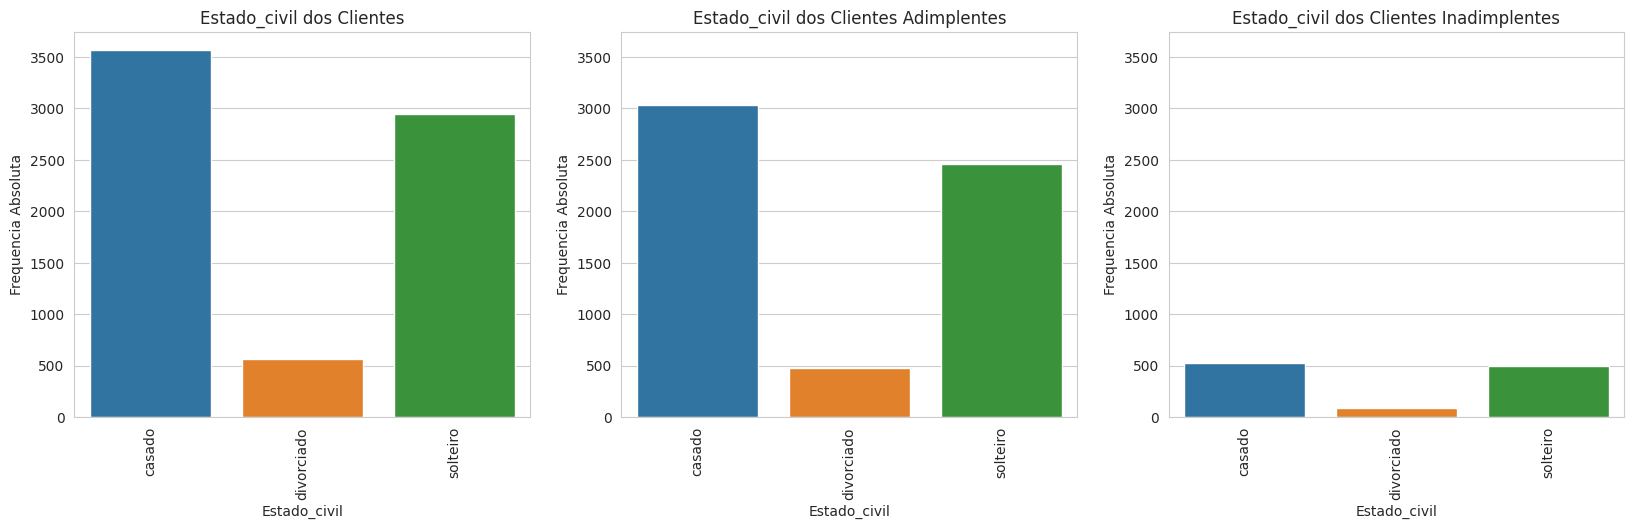

In [90]:
plot_tabela_clientes(df, df_adimplente, df_inadimplente, coluna=coluna_estado_civil, titulos=titulo_estado_civil)

- Tipo de cartão

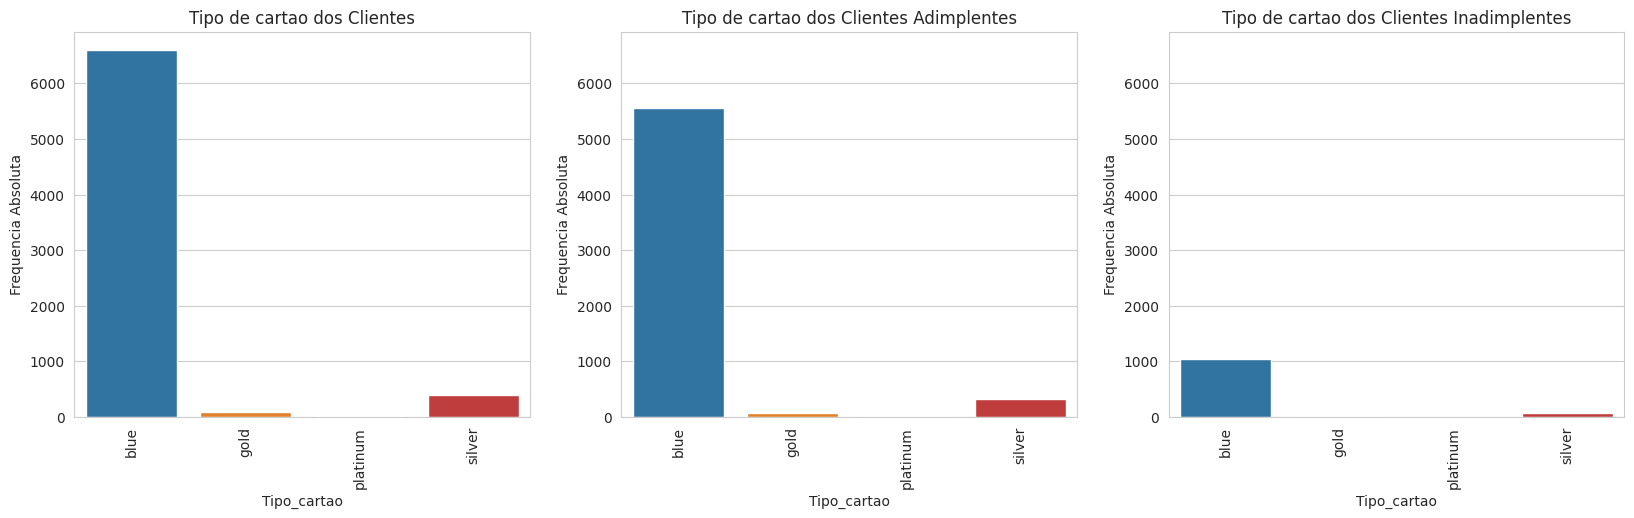

In [91]:
plot_tabela_clientes(df, df_adimplente, df_inadimplente, coluna=coluna_tipo_cartao, titulos=titulo_tipo_cartao)

**Obs:**
- Analisando os atributos categóricos, notamos que o padrão se mantém e não há diferença significativa que possa tornar os clientes inadimplentes.

### **4.2. Visualizações numéricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [92]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


In [93]:
coluna_qtd_transacoes = 'qtd_transacoes_12m'
titulo_qtd_transacoes = ['Qtd. de Transações no Último Ano','Qtd. de Transações no Último Ano de Adimplentes',
                         'Qtd. de Transações no Último Ano de Inadimplentes']

In [94]:
coluna_valor_transacoes = 'valor_transacoes_12m'
titulo_valor_transacoes = ['Valor das Transações no Último Ano','Valor das Transações no Último Ano de Adimplentes',
                           'Valor das Transações no Último Ano de Inadimplentes']

In [95]:
def plot_numerico(df, df_adimplente, df_inadimplente, coluna=None, titulos=None):
  
    eixo = 0
    max_y = 0
    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

    for dataframe in [df, df_adimplente, df_inadimplente]:
      f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequencia Absoluta')

      _, max_y_f = f.get_ylim()
      max_y = max_y_f if max_y_f > max_y else max_y
      f.set(ylim=(0, max_y))

      eixo += 1
      plt.close()

    return figura

 - Quantidade de Transações nos Últimos 12 Meses

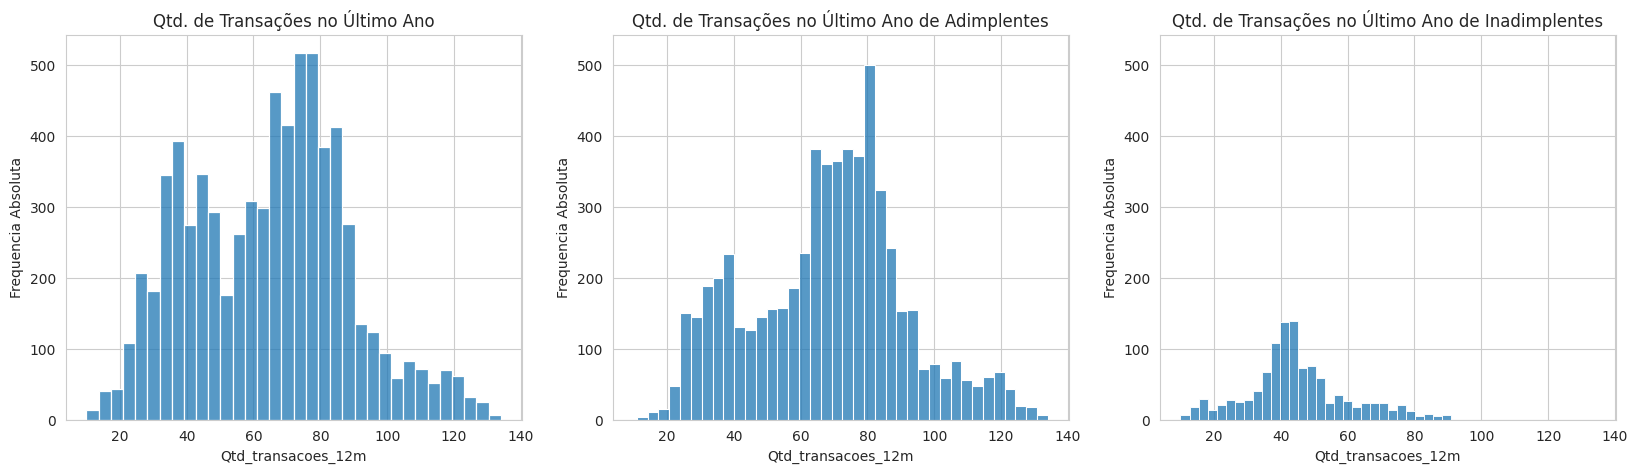

In [96]:
plot_numerico(df, df_adimplente, df_inadimplente, coluna=coluna_qtd_transacoes, titulos=titulo_qtd_transacoes)

**1.insight**

Analisando os atributos numéricos, podemos notar que clientes que realizaram entre 20 e 60 transações por ano apresentam uma possibilidade maior de se tornarem inadimplentes.

 - Valor das Transações nos Últimos 12 Meses

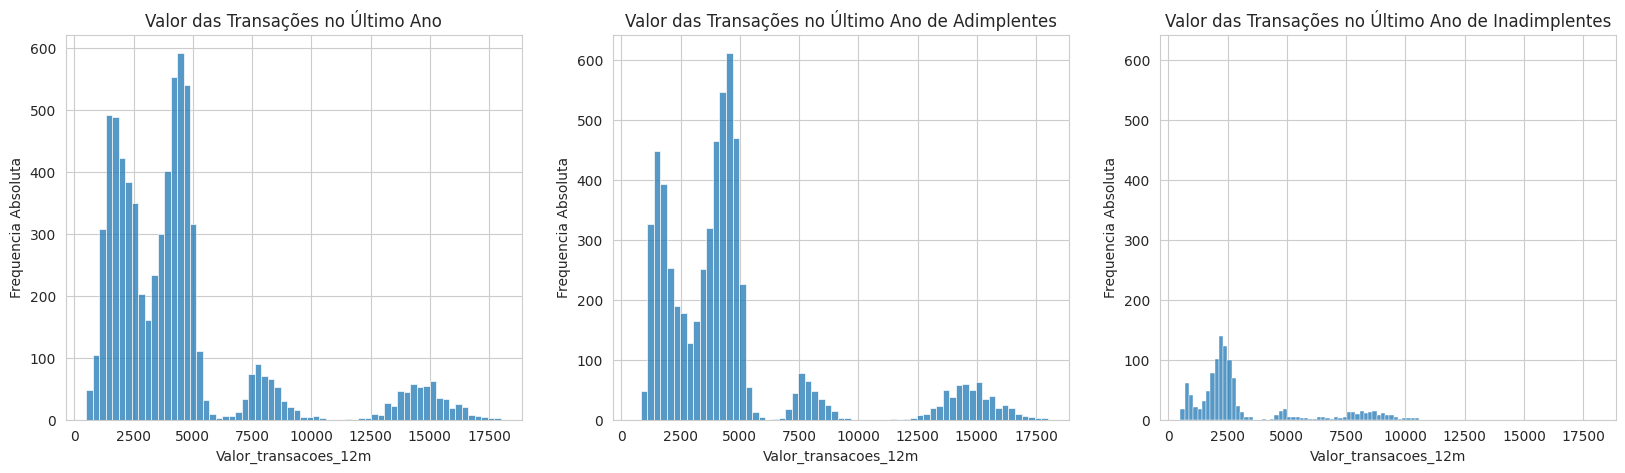

In [97]:
plot_numerico(df, df_adimplente, df_inadimplente, coluna=coluna_valor_transacoes, titulos=titulo_valor_transacoes)

**2.insight**

Clientes inadimplentes estão apresentando um padrão de comportamento no qual eles têm um valor de transação nos últimos 12 meses muito próximo de R$2.500. 

 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

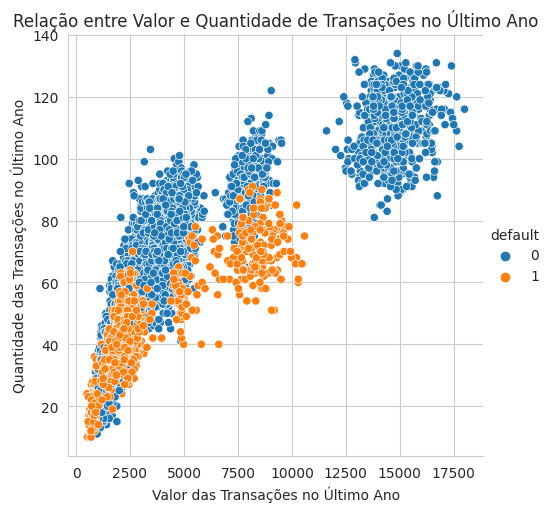

In [98]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
)

**Obs:**

Podemos observar que as pessoas que realizaram entre **90 e 140** transações no último ano e transacionaram entre **12.500 e 17.500** não cometeram nenhum tipo de default. No entanto, ao analisarmos o grupo de clientes que transacionaram entre **7.500 e 10.000**, começamos a notar a presença de alguns clientes que cometeram default. Mas a maioria dos clientes inadimplentes, no entanto, concentra-se no grupo de transações entre **1.000 e 2.500**, com um número de transações entre **10 e 60** no último ano.

Com base nas análises acima podemos chegar na conclusão que.

**Insights.**

- Clientes que realizaram entre **20 e 60** transações por ano apresentam uma possibilidade maior de se tornarem inadimplentes.

- Clientes que transacionam entre **1.000 e 2.500** apresentam uma maior probabilidade de se tornarem inadimplentes.